#  Fast Food

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from scipy.stats import bootstrap
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Load the data
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.utils import resample

In [2]:
mcd = pd.read_csv("C:/Users/ayans/Downloads/mcdonalds.csv")
print(mcd.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [3]:
print(mcd.shape)

(1453, 15)


In [4]:

MD_x = (mcd.iloc[:, 0:11] == "Yes").astype(int)
print(np.round(MD_x.mean(), 2))
attributes = ['cheap', 'expensive', 'disgusting', 'greasy', 'fattening', 'fast', 'convenient', 'healthy', 'tasty', 'yummy']
pca = PCA()
MD_pca = pca.fit_transform(MD_x)


yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [5]:
print(pca.explained_variance_ratio_)


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


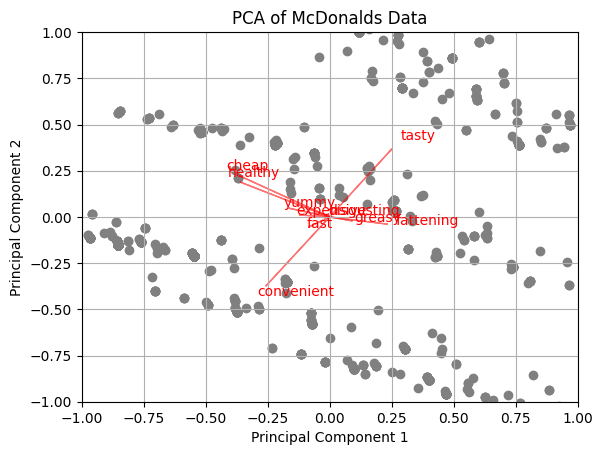

In [6]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
for i, attribute in enumerate(attributes):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='red', alpha=0.5)
    plt.text(loadings[i, 0]*1.15, loadings[i, 1]*1.15, attribute, color='red')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonalds Data')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid(True)
plt.show()

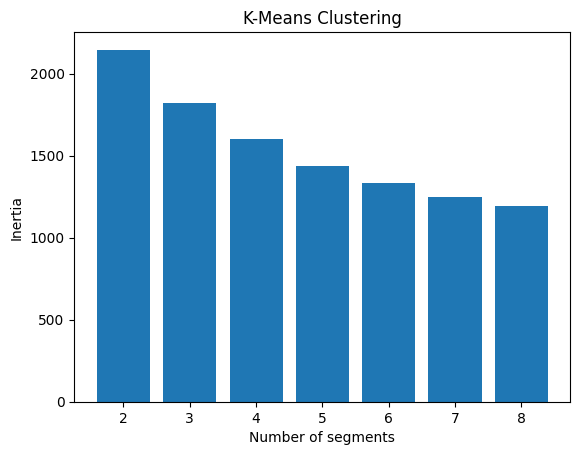

In [7]:

np.random.seed(1234)
inertia = []
kmeans_models = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)
    kmeans_models.append(kmeans)
plt.bar(range(2, 9), inertia)
plt.xlabel('Number of segments')
plt.ylabel('Inertia')
plt.title('K-Means Clustering')
plt.show()

In [8]:

# Function to compute adjusted Rand index for k-means clustering
def compute_stability(X, num_segments, nboot=100, nrep=10, random_state=1234):
    np.random.seed(random_state)
    stability_scores = {k: [] for k in num_segments}

    for k in num_segments:
        for _ in range(nboot):
            # Bootstrap sample
            X_bootstrap = resample(X, replace=True)

            # Run KMeans for the bootstrapped sample with multiple initializations
            cluster_labels = []
            for _ in range(nrep):
                kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
                cluster_labels.append(kmeans.fit_predict(X_bootstrap))

            # Calculate pairwise adjusted Rand index between clusterings
            rand_indices = []
            for i in range(nrep):
                for j in range(i+1, nrep):
                    rand_indices.append(adjusted_rand_score(cluster_labels[i], cluster_labels[j]))

            # Store the median stability score
            stability_scores[k].append(np.median(rand_indices))

    return stability_scores



In [9]:


def plot_stability(stability_scores):
    fig, ax = plt.subplots()
    ax.boxplot([stability_scores[k] for k in stability_scores.keys()])
    ax.set_xticklabels(stability_scores.keys())
    ax.set_xlabel('Number of segments')
    ax.set_ylabel('Adjusted Rand Index')
    ax.set_title('Global Stability for Different Numbers of Segments')
    plt.show()
    
    
    
MD_x = (mcd.iloc[:, 0:11] == "Yes").astype(int)
num_segments = range(2, 9)  
stability_scores = compute_stability(MD_x, num_segments, nboot=100, nrep=10) 
plot_stability(stability_scores)


KeyboardInterrupt: 

c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


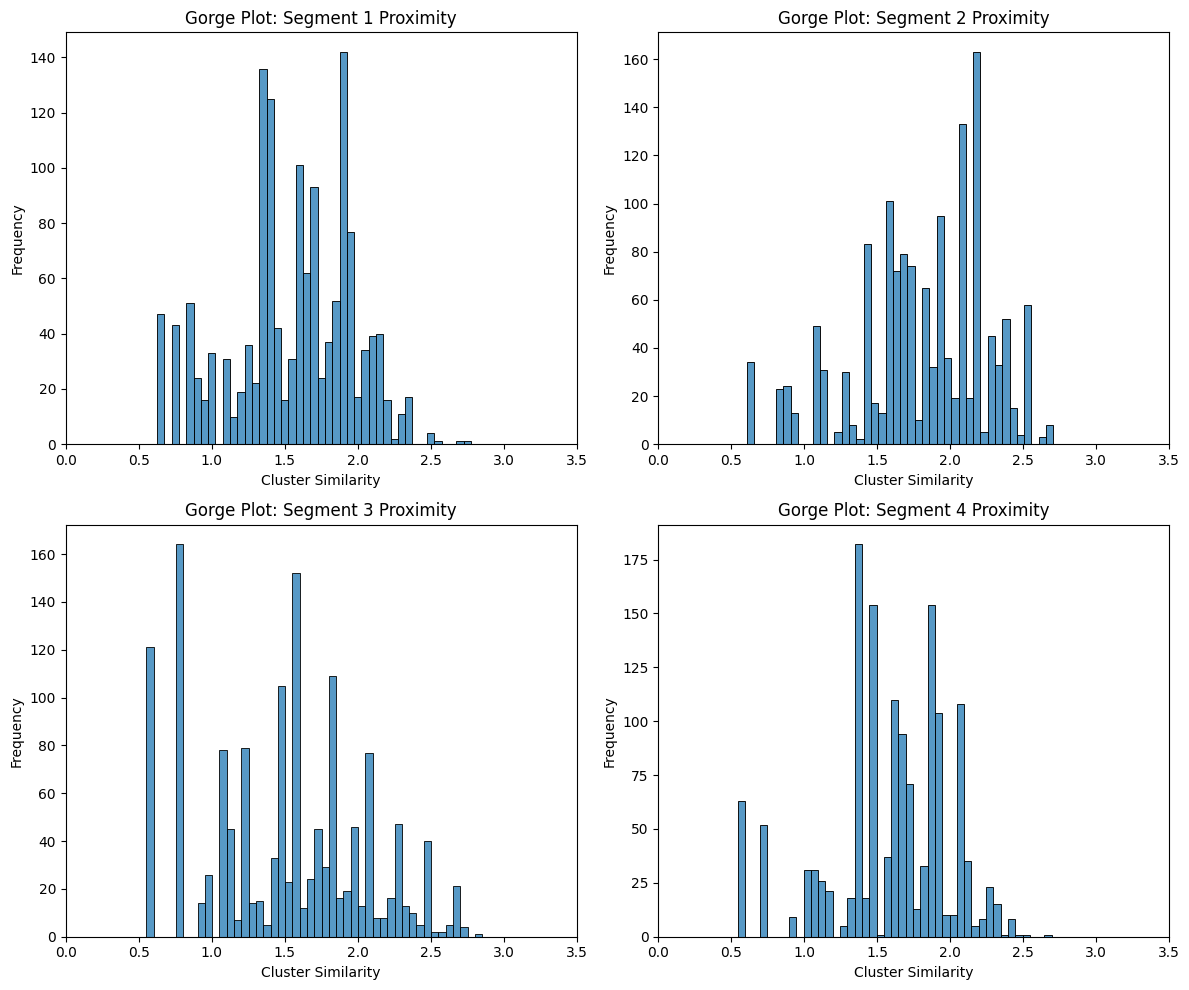

In [10]:

# KMeans for 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=1234)
kmeans_4.fit(MD_x)


fig, axs = plt.subplots(2, 2, figsize=(12, 10))  

for i in range(4):
   
    similarity_values = kmeans_4.transform(MD_x)[:, i]
    row = i // 2
    col = i % 2
    sns.histplot(similarity_values, kde=False, binwidth=0.05, ax=axs[row, col])
    axs[row, col].set_xlim(0, 3.5)
    axs[row, col].set_xlabel('Cluster Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title(f'Gorge Plot: Segment {i+1} Proximity')


plt.tight_layout()
plt.show()


c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

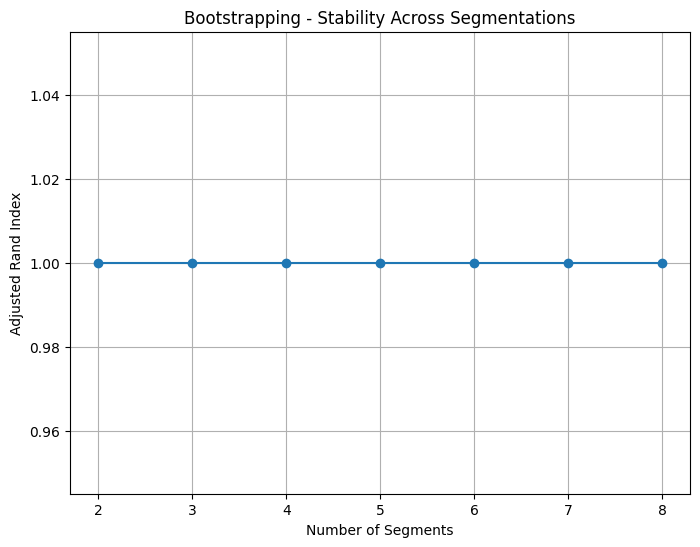

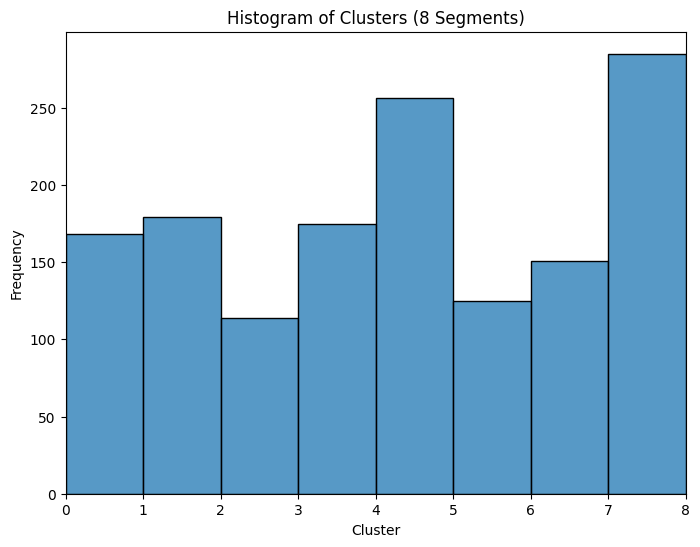

In [11]:

cluster_range = range(2, 9)
kmeans_models = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    kmeans.fit(MD_x)
    kmeans_models.append(kmeans)
n_bootstraps = 100
adjusted_rand_indices = []
for kmeans in kmeans_models:
    labels = kmeans.labels_
    bootstrapped_ari = []
    
    for _ in range(n_bootstraps):
        indices = np.random.choice(range(len(MD_x)), size=len(MD_x), replace=True)
        boot_labels = kmeans.predict(MD_x.iloc[indices])  
        
        ari = adjusted_rand_score(labels[indices], boot_labels)
        bootstrapped_ari.append(ari)
    
   
    adjusted_rand_indices.append(np.mean(bootstrapped_ari))


plt.figure(figsize=(8, 6))
plt.plot(cluster_range, adjusted_rand_indices, marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Bootstrapping - Stability Across Segmentations')
plt.grid(True)
plt.show()


plt.figure(figsize=(8, 6))
sns.histplot(kmeans_models[-1].labels_, bins=range(9), kde=False)
plt.xlim(0, 8)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Clusters (8 Segments)')
plt.show()


c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

    Segment Number   Stability
0                2    0.000000
1                2    0.000000
2                3  166.176000
3                3  106.953000
4                3   85.078000
5                4   19.210000
6                4   26.867000
7                4   17.876000
8                4   24.384333
9                5    6.188000
10               5    9.492167
11               5    5.963000
12               5    6.142667
13               5    7.575167
14               6    3.906000
15               6    3.419100
16               6    1.990000
17               6    2.497600
18               6    2.453100
19               6    3.498000
20               7    0.508400
21               7    1.817400
22               7    0.686400
23               7    2.244667
24               7    1.665067
25               7    1.635400
26               7    1.992667
27               8    0.437143
28               8    1.276000
29               8    0.511000
30               8    1.232286
31      

C:\Users\ayans\AppData\Local\Temp\ipykernel_19324\297510837.py:61: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_for_boxplot, labels=segment_numbers, showmeans=True, patch_artist=True)


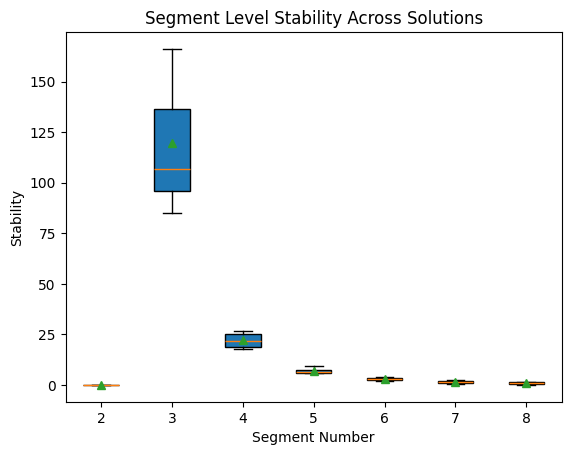

In [12]:

mcdonalds = pd.read_csv("C:/Users/ayans/Downloads/mcdonalds.csv")
mcdonalds = mcdonalds.replace('No', 0)
mcdonalds = mcdonalds.replace('Yes', 1)
mcdonalds = mcdonalds.replace('I love it!+5', 5)
mcdonalds = mcdonalds.replace('I hate it!-5', -5)
mcdonalds = mcdonalds.replace('Female', 0)
mcdonalds = mcdonalds.replace('Male', 1)

mcdonalds = mcdonalds.replace('Once a year', 1)
mcdonalds = mcdonalds.replace('Once a month', 2)
mcdonalds = mcdonalds.replace('More than once a week', 3)
mcdonalds = mcdonalds.replace('Every three months', 4)
mcdonalds = mcdonalds.replace('Once a week', 4)
mcdonalds = mcdonalds.replace('Never', 0)


stability = []
for num_segments in range(2, 9):
    kmeans = KMeans(n_clusters=num_segments, random_state=42)
    kmeans.fit(mcdonalds)
    labels = kmeans.labels_

  
    connections = {}
    for i in range(len(labels) - 1):
        for j in range(i + 1, len(labels)):
            if labels[i] == labels[j]:
                if labels[i] not in connections:
                    connections[labels[i]] = []
                connections[labels[i]].append((i, j))

    #
    cluster_stability = []
    for cluster in connections:
        if num_segments == 2:
            stability_score = 0
        else:
            stability_score = len(connections[cluster]) / ((num_segments - 1) * (num_segments - 2) / 2*1000)
        
        cluster_stability.append((cluster, stability_score))

   
    stability.append(cluster_stability)

segment_stability_data = []

for i in range(len(stability)):
    for j in range(len(stability[i])):
        segment_stability_data.append([i + 2, stability[i][j][1]])

segment_stability_df = pd.DataFrame(segment_stability_data, columns=['Segment Number', 'Stability'])
print(segment_stability_df)
import matplotlib.pyplot as plt

segment_numbers = segment_stability_df['Segment Number'].unique()


data_for_boxplot = []
for segment in segment_numbers:
    data_for_boxplot.append(segment_stability_df[segment_stability_df['Segment Number'] == segment]['Stability'].values)
plt.boxplot(data_for_boxplot, labels=segment_numbers, showmeans=True, patch_artist=True)
plt.xlabel('Segment Number')
plt.ylabel('Stability')
plt.title('Segment Level Stability Across Solutions')
plt.show()

Model with 2 components:
Converged: True
k: 2
k0: 155
logLik: 3.402351026958141
AIC: 303.1952979460837
BIC: 1121.8100757994775
ICL: 1118.1693829676924

Model with 3 components:
Converged: True
k: 3
k0: 233
logLik: 10.417699811635181
AIC: 445.16460037672965
BIC: 1675.7274599886055
ICL: 1668.4460743250352

Model with 4 components:
Converged: True
k: 4
k0: 311
logLik: 10.991643485896326
AIC: 600.0167130282074
BIC: 2242.5276543985656
ICL: 2231.60557590321

Model with 5 components:
Converged: True
k: 5
k0: 389
logLik: 9.438072814278375
AIC: 759.1238543714433
BIC: 2813.582877500283
ICL: 2799.0201061731423

Model with 6 components:
Converged: True
k: 6
k0: 467
logLik: 14.122530520974973
AIC: 905.75493895805
BIC: 3372.162043845372
ICL: 3353.9585796864462

Model with 7 components:
Converged: True
k: 7
k0: 545
logLik: 17.872167346137687
AIC: 1054.2556653077247
BIC: 3932.6108519535283
ICL: 3910.7666949628174

Model with 8 components:
Converged: True
k: 8
k0: 623
logLik: 16.290732000931285
AIC: 12

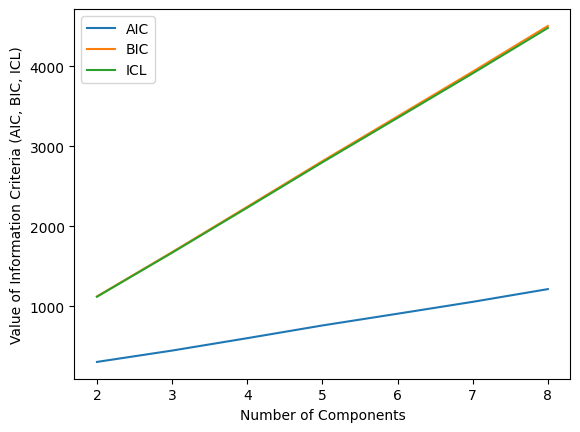

In [16]:


mcd = pd.read_csv("C:/Users/ayans/Downloads/mcdonalds.csv")

MD_x = (mcd.iloc[:, 0:11] == "Yes").astype(int)

n_components_range = range(2, 9)

converged = []
k_values = []
k0_values = []
logLik_values = []
AIC_values = []
BIC_values = []
ICL_values = []

for n_components in n_components_range:
    MD_m28 = GaussianMixture(n_components=n_components, covariance_type='full')
    MD_m28.fit(MD_x)
    converged.append(MD_m28.converged_)
    k_values.append(n_components)
    k0_values.append(MD_m28._n_parameters())
    logLik_values.append(MD_m28.score(MD_x))
    AIC_values.append(2 * k0_values[-1] - 2 * logLik_values[-1])
    BIC_values.append(np.log(MD_x.shape[0]) * k0_values[-1] - 2 * logLik_values[-1])
    ICL_values.append(BIC_values[-1] - 0.5 * (n_components - 1) * np.log(MD_x.shape[0]))

for i in range(len(n_components_range)):
    print(f"Model with {n_components_range[i]} components:")
    print(f"Converged: {converged[i]}")
    print(f"k: {k_values[i]}")
    print(f"k0: {k0_values[i]}")
    print(f"logLik: {logLik_values[i]}")
    print(f"AIC: {AIC_values[i]}")
    print(f"BIC: {BIC_values[i]}")
    print(f"ICL: {ICL_values[i]}")
    print()
    
    
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Plot the information criteria
plt.plot(n_components_range, AIC_values, label='AIC')
plt.plot(n_components_range, BIC_values, label='BIC')
plt.plot(n_components_range, ICL_values, label='ICL')
plt.xlabel('Number of Components')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.legend()
plt.show()


c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ayans\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

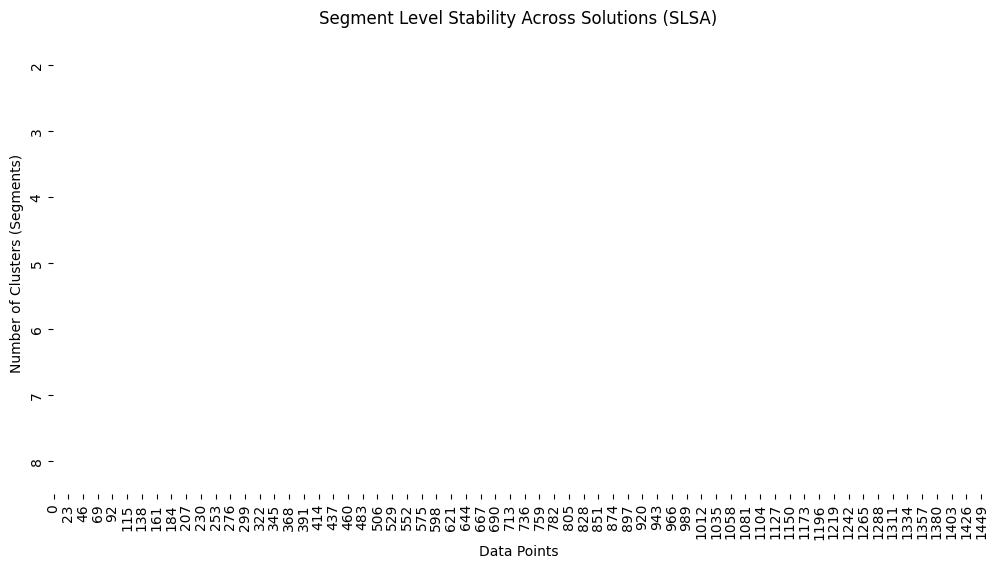

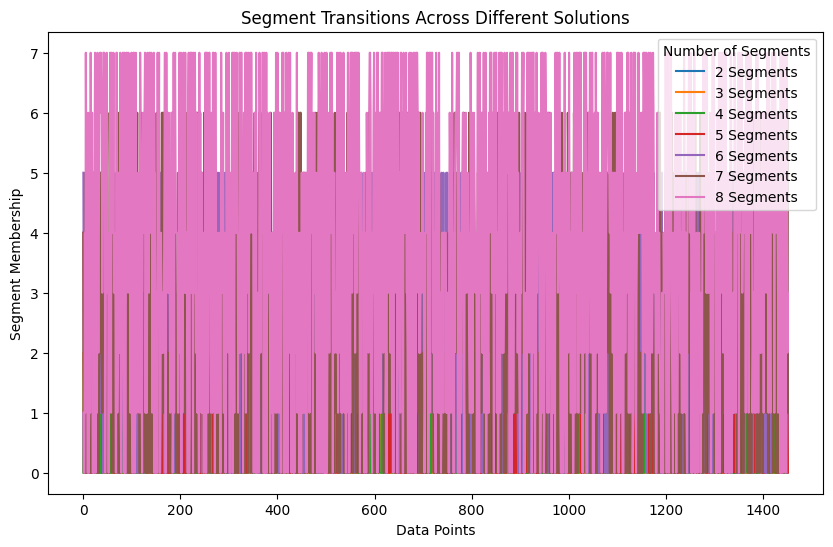

In [17]:

mcd = pd.read_csv("C:/Users/ayans/Downloads/mcdonalds.csv")

MD_x = (mcd.iloc[:, 0:11] == "Yes").astype(int)

cluster_range = range(2, 9)

cluster_memberships = {}

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=1234)
    cluster_memberships[n_clusters] = kmeans.fit_predict(MD_x)

membership_df = pd.DataFrame(cluster_memberships)

plt.figure(figsize=(12, 6))


sns.heatmap(membership_df.T, cmap="tab20", cbar=False, linewidths=0.5)
plt.xlabel("Data Points")
plt.ylabel("Number of Clusters (Segments)")
plt.title("Segment Level Stability Across Solutions (SLSA)")
plt.show()


plt.figure(figsize=(10, 6))

for n_clusters in cluster_range:
    plt.plot(membership_df.index, membership_df[n_clusters], label=f"{n_clusters} Segments")

plt.xlabel("Data Points")
plt.ylabel("Segment Membership")
plt.title("Segment Transitions Across Different Solutions")
plt.legend(title="Number of Segments")
plt.show()
